# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
# get the html contents of the webpage
html = browser.html
soup = soup(html, 'html.parser')


In [5]:
# Extract all rows of data
rows = soup.find_all('tr', class_='data-row')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
data = []

for row in rows:
    # Extract data from each row
    data_elements = row.find_all('td')
    
    # Initialize a list to store the data for this row
    row_data = []
    
    # Extract and store data in the list
    for element in data_elements:
        row_data.append(element.text)
    
    # Append the row data list to the data list
    data.append(row_data)
data

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df = pd.DataFrame(data, columns=columns)


In [8]:
# Confirm DataFrame was created successfully
print(df)


        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
# Display the current data types of each column
print("Current Data Types:")
print(df.dtypes)

Current Data Types:
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype('int64')
df['ls'] = df['ls'].astype('int64')
df['month'] = df['month'].astype('int64')
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
# Count the occurrences of each month number
month_counts = df['month'].value_counts().sort_index()

# Create a DataFrame to display the count of months on Mars
df_month_counts = pd.DataFrame({'Month Number': month_counts.index, 'Count of Months': month_counts.values})

# Set the 'Month Number' as the index for better display
df_month_counts.set_index('Month Number', inplace=True)

# Display the DataFrame with the count of months on Mars
print(df_month_counts)

              Count of Months
Month Number                 
1                         174
2                         178
3                         192
4                         194
5                         149
6                         147
7                         142
8                         141
9                         134
10                        112
11                        138
12                        166


In [13]:
# 2. How many Martian days' worth of data are there?
total_days = df['sol'].nunique()

# Display the total number of Martian days' worth of data
print("Total Martian days' worth of data:", total_days)

Total Martian days' worth of data: 1867


In [14]:
# 3. What is the average low temperature by month?
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()
print("Average Low Temperature by Month:")
print(average_low_temp_by_month)


Average Low Temperature by Month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


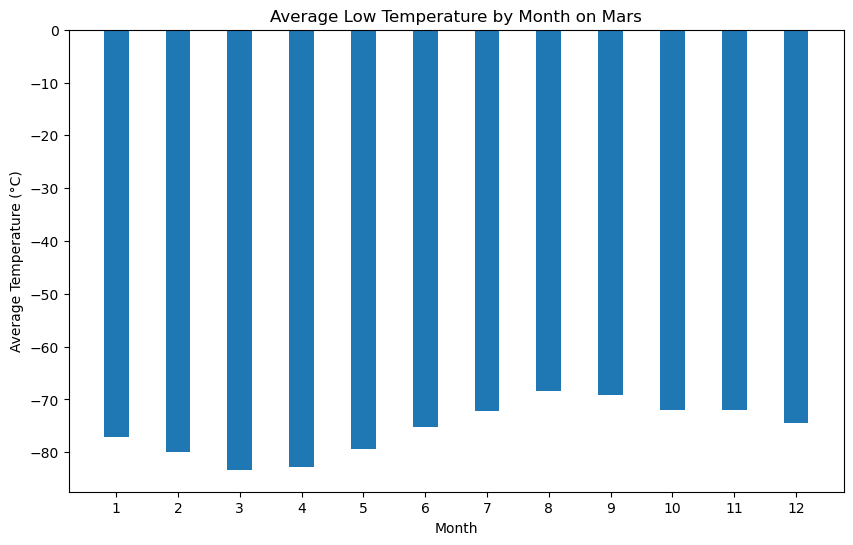

In [15]:
# Plot the average temperature by month
plt.figure(figsize=(10, 6))
plt.bar(average_low_temp_by_month.index, average_low_temp_by_month.values, width=0.4)
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Low Temperature by Month on Mars')
plt.xticks(range(1, 13))  # Assuming months are from 1 to 12
plt.show()

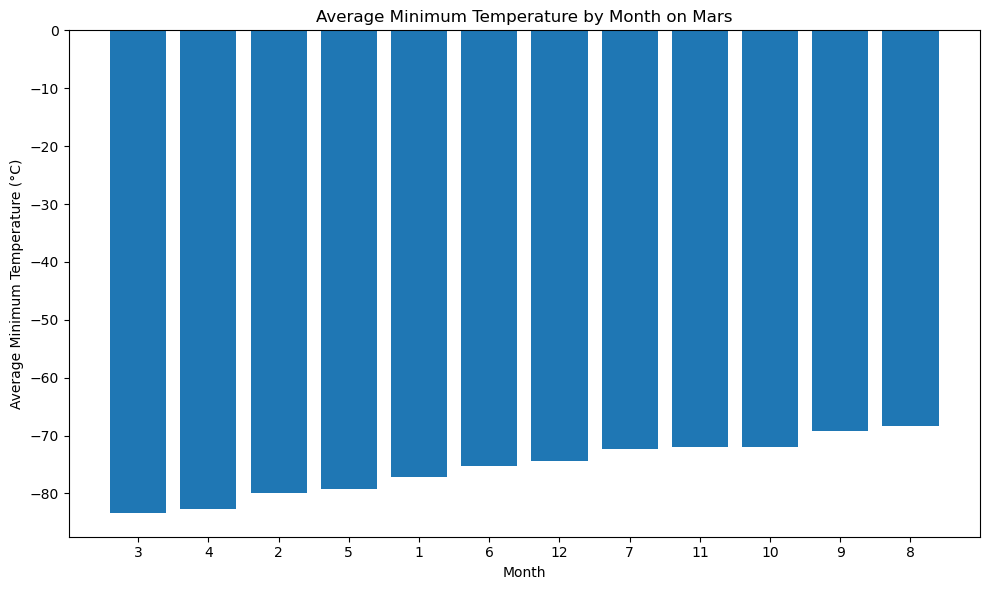

In [16]:
# Identify the coldest and hottest months in Curiosity's location
# Sort the average temperatures in ascending order
average_min_temp_sorted = average_low_temp_by_month.sort_values()

# Create a bar chart for average minimum temperature by month
plt.figure(figsize=(10, 6))
plt.bar(range(1, 13), average_min_temp_sorted.values)
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.title('Average Minimum Temperature by Month on Mars')
plt.xticks(range(1, 13), labels=average_min_temp_sorted.index)
plt.tight_layout()

plt.show()

In [17]:
# 4. Average pressure by Martian month
average_pressure_by_month = df.groupby('month')['pressure'].mean()
print("Average Pressure by Month:")
print(average_pressure_by_month)

Average Pressure by Month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


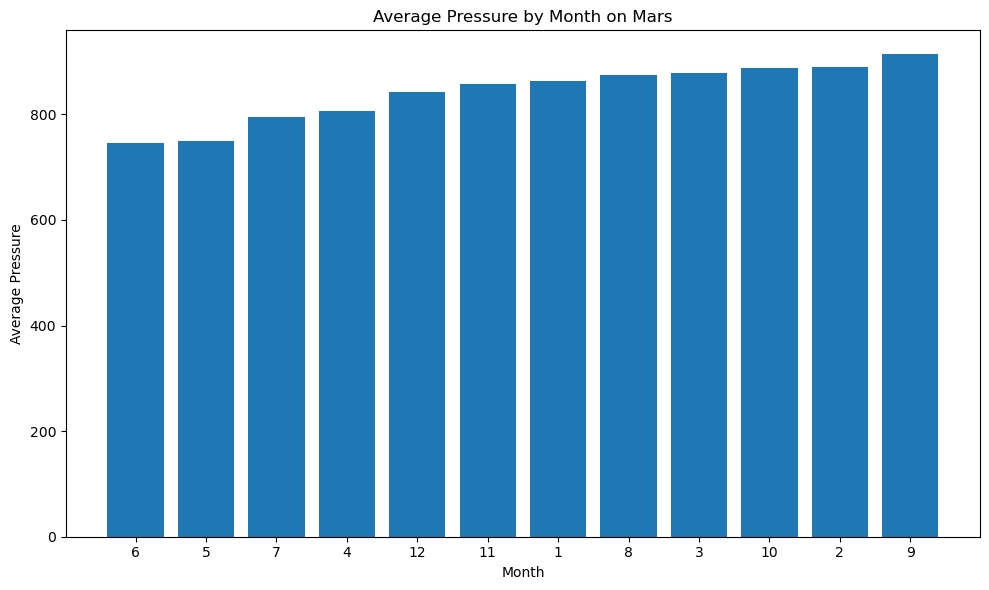

In [18]:
# Plot the average pressure by month
# Sort the average temperatures in ascending order
average_pressure_sorted = average_pressure_by_month.sort_values()

# Create a bar chart for average minimum temperature by month
plt.figure(figsize=(10, 6))
plt.bar(range(1, 13), average_pressure_sorted.values)
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure by Month on Mars')
plt.xticks(range(1, 13), labels=average_pressure_sorted.index)
plt.tight_layout()

plt.show()

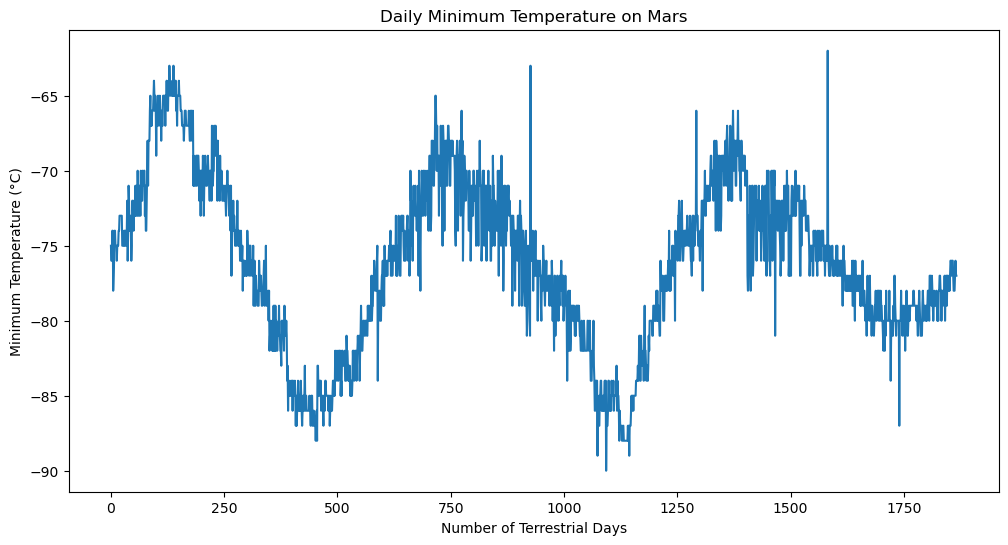

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['min_temp'])
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Daily Minimum Temperature on Mars')

plt.show()

In [20]:
coldest_month = average_low_temp_by_month.idxmin()

warmest_month = average_low_temp_by_month.idxmax()

lowest_pressure_month = average_pressure_by_month.idxmin()
highest_pressure_month = average_pressure_by_month.idxmax()

print(f"On average, the {coldest_month}rd month has the coldest minimum temperature on Mars, and the {warmest_month}th month is the warmest.")
print(f"Atmospheric pressure is, on average, lowest in the {lowest_pressure_month}th month and highest in the {highest_pressure_month}th")
print(f"The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.")

On average, the 3rd month has the coldest minimum temperature on Mars, and the 8th month is the warmest.
Atmospheric pressure is, on average, lowest in the 6th month and highest in the 9th
The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
df.to_csv('mars_data.csv', index=False)
print("DataFrame saved to mars_data.csv")


DataFrame saved to mars_data.csv


In [22]:
browser.quit()